# EDA Trend Starter Notebook

## 1. Prerequisites and Loading the Data

In [1]:
# Necessary packages
import numpy as np
import pandas as pd
import re

# Plotting
import matplotlib.pyplot as plt

In [2]:
# Loading the data
trend_df = pd.read_csv('data/quarterly_moving_average_data.csv', index_col=0)
trend_df = trend_df.transpose()

# Extract the quarter names in the index of seasonality_df
temp_dict = dict()

for i in trend_df.index:
    match = re.search(r"Average_MA_20_(\w+)$", i)
    if match:
        temp_dict[i] = match.group(1)
    else:
        pass

trend_df = trend_df.rename(index=temp_dict)

In [3]:
display(trend_df)

,AC,ACEN,AEV,AGI,ALI,AREIT,BDO,BLOOM,BPI,CBC,...,MBT,MER,MONDE,PGOLD,SCC,SM,SMC,SMPH,TEL,URC
Q2_2021,768.628921,7.569759,35.209826,9.936975,34.759671,29.103975,83.004259,6.805457,71.506555,19.976199,...,38.706214,226.961676,12.845653,33.248876,7.216165,954.931720,111.375786,35.630522,988.418187,122.838175
Q3_2021,740.927396,8.698948,36.607679,9.720331,32.760865,29.719575,85.211528,6.028906,70.651069,20.192914,...,36.771317,228.800792,15.130426,35.055296,8.640308,947.042957,107.016218,33.134460,1019.037314,121.907441
Q4_2021,818.159693,11.322948,44.447231,10.446196,33.775336,35.764623,94.970865,6.622948,73.242200,20.250480,...,38.758807,244.180115,16.081129,35.974461,12.661567,944.814895,109.658314,33.577161,1305.398823,117.615738
Q1_2022,820.536633,9.027545,52.499642,11.994262,34.547020,40.984138,99.643635,6.385627,81.197498,21.353098,...,44.997758,276.706738,14.744906,31.801297,14.176222,899.299133,105.154161,34.763120,1437.063963,109.333140
Q2_2022,702.379723,7.563727,47.986554,11.036258,30.567021,34.520171,99.679828,6.162225,81.325470,22.593236,...,43.737151,303.352047,13.045449,29.923189,17.863504,825.396671,101.850946,35.536106,1499.330119,99.179759
Q3_2022,650.357634,7.880544,49.284052,9.349215,25.707618,31.439446,94.309845,6.291031,78.322347,23.916475,...,41.313865,287.183008,13.795647,28.220610,22.824540,794.098078,98.584350,35.403277,1392.656217,106.385922
Q4_2022,644.609515,6.370086,50.879698,8.794565,25.495138,28.810198,97.298142,6.766068,81.347085,23.186000,...,43.538475,254.382957,11.456155,27.412610,21.786323,807.693099,93.951422,32.307371,1305.050826,111.034071
Q1_2023,673.578032,6.926723,50.582008,11.982717,28.501691,30.803822,112.914779,8.706719,90.696245,25.467500,...,48.963590,259.890089,11.636531,29.898738,20.429194,878.057135,99.151710,35.025964,1154.781286,127.882618
Q2_2023,638.596609,5.924312,49.663664,12.714692,25.692380,29.628603,126.895904,9.795014,97.091342,28.311223,...,50.474256,288.707274,8.696380,28.579637,19.889379,884.838018,102.982609,32.438652,1094.109861,132.765454
Q3_2023,604.454224,5.134343,47.464827,12.398354,26.077227,30.271244,133.407718,10.825410,105.364470,28.178230,...,48.680330,309.680173,7.441234,25.837026,21.228903,864.988858,103.109009,30.902015,1118.797873,116.077223


In [4]:
trend_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Q2_2021 to Q4_2024
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      15 non-null     float64
 1   ACEN    15 non-null     float64
 2   AEV     15 non-null     float64
 3   AGI     15 non-null     float64
 4   ALI     15 non-null     float64
 5   AREIT   15 non-null     float64
 6   BDO     15 non-null     float64
 7   BLOOM   15 non-null     float64
 8   BPI     15 non-null     float64
 9   CBC     15 non-null     float64
 10  CNPF    15 non-null     float64
 11  CNVRG   15 non-null     float64
 12  DMC     15 non-null     float64
 13  EMI     15 non-null     float64
 14  GLO     15 non-null     float64
 15  GTCAP   15 non-null     float64
 16  ICT     15 non-null     float64
 17  JFC     15 non-null     float64
 18  JGS     15 non-null     float64
 19  LTG     15 non-null     float64
 20  MBT     15 non-null     float64
 21  MER     15 non-null     float64
 22

## 2. Trend EDA

In [10]:
ma_analysis_df = pd.DataFrame()

### 1. TEL

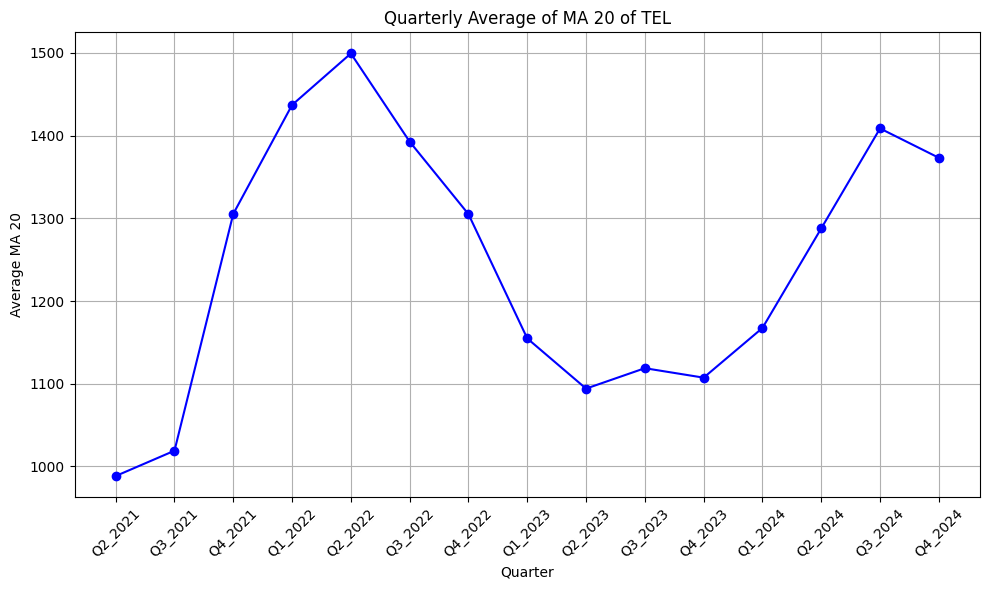

In [5]:
ticker = 'TEL'

plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Quarterly Average of MA 20 of {ticker}")
plt.xlabel('Quarter')
plt.ylabel('Average MA 20')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
ticker = 'TEL'
ticker_column = trend_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values

print(f"Max Quarterly MA 20: {max_value} (Quarter: {max_index})")
print(f"Min Quarterly MA 20 : {min_value} (Quarter: {min_index})")
print(f"Q1 Value in {ticker} Quarterly MA 20: {q1_val} ")
print(f"Q3 Value in {ticker} Quarterly MA 20: {q3_val} ")
print(f"Interquartile Range in the {ticker} Quarterly MA 20: {iqr}")

# Appending metrics to ma_analysis_df
data = {
    'Ticker': ticker,
    'Average Quarterly Moving Average': avg_value,
    'Median Quarterly Moving Average': median_value,
    'Max Quarterly Moving Average': max_value,
    'Max Quarter': max_index,
    'Min Quarterly Moving Average': min_value,
    'Min Quarter': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to ma_analysis_df
ma_analysis_df = pd.concat([ma_analysis_df, new_row], ignore_index=True)
ma_analysis_df

Max Quarterly MA 20: 1499.33 (Quarter: Q2_2022)
Min Quarterly MA 20 : 988.418 (Quarter: Q2_2021)
Q1 Value in TEL Quarterly MA 20: 1113.078 
Q3 Value in TEL Quarterly MA 20: 1382.927 
Interquartile Range in the TEL Quarterly MA 20: 269.849


,Ticker,Average Quarterly Moving Average,Median Quarterly Moving Average,Max Quarterly Moving Average,Max Quarter,Min Quarterly Moving Average,Min Quarter,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1243.941,1287.82,1499.33,Q2_2022,988.418,Q2_2021,1113.078,1382.927,269.849


### 2. GLO

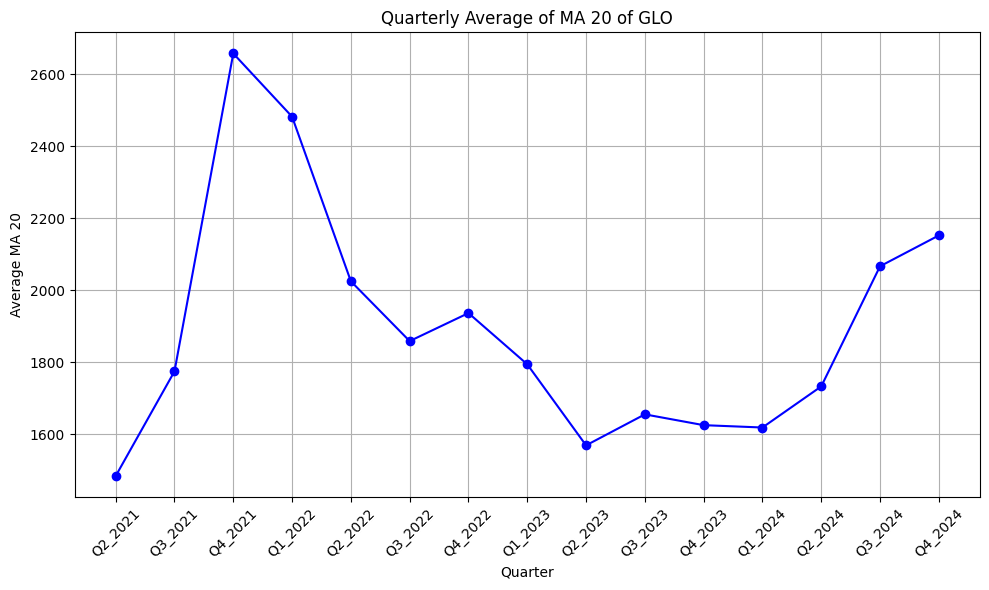

In [9]:
ticker = 'GLO'

plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Quarterly Average of MA 20 of {ticker}")
plt.xlabel('Quarter')
plt.ylabel('Average MA 20')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
ticker = 'GLO'
ticker_column = trend_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Max Quarterly MA 20: {max_value} (Quarter: {max_index})")
print(f"Min Quarterly MA 20 : {min_value} (Quarter: {min_index})")
print(f"Q1 Value in {ticker} Quarterly MA 20: {q1_val} ")
print(f"Q3 Value in {ticker} Quarterly MA 20: {q3_val} ")
print(f"Interquartile Range in the {ticker} Quarterly MA 20: {iqr}")

# Appending metrics to ma_analysis_df
data = {
    'Ticker': ticker,
    'Average Quarterly Moving Average': avg_value,
    'Median Quarterly Moving Average': median_value,
    'Max Quarterly Moving Average': max_value,
    'Max Quarter': max_index,
    'Min Quarterly Moving Average': min_value,
    'Min Quarter': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to ma_analysis_df
ma_analysis_df = pd.concat([ma_analysis_df, new_row], ignore_index=True)
ma_analysis_df

Max Quarterly MA 20: 2657.725 (Quarter: Q4_2021)
Min Quarterly MA 20 : 1483.467 (Quarter: Q2_2021)
Q1 Value in GLO Quarterly MA 20: 1639.834 
Q3 Value in GLO Quarterly MA 20: 2045.529 
Interquartile Range in the GLO Quarterly MA 20: 405.695


,Ticker,Average Quarterly Moving Average,Median Quarterly Moving Average,Max Quarterly Moving Average,Max Quarter,Min Quarterly Moving Average,Min Quarter,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1243.941,1287.820,1499.330,Q2_2022,988.418,Q2_2021,1113.078,1382.927,269.849
1,GLO,1895.233,1793.862,2657.725,Q4_2021,1483.467,Q2_2021,1639.834,2045.529,405.695


### 3. CBC

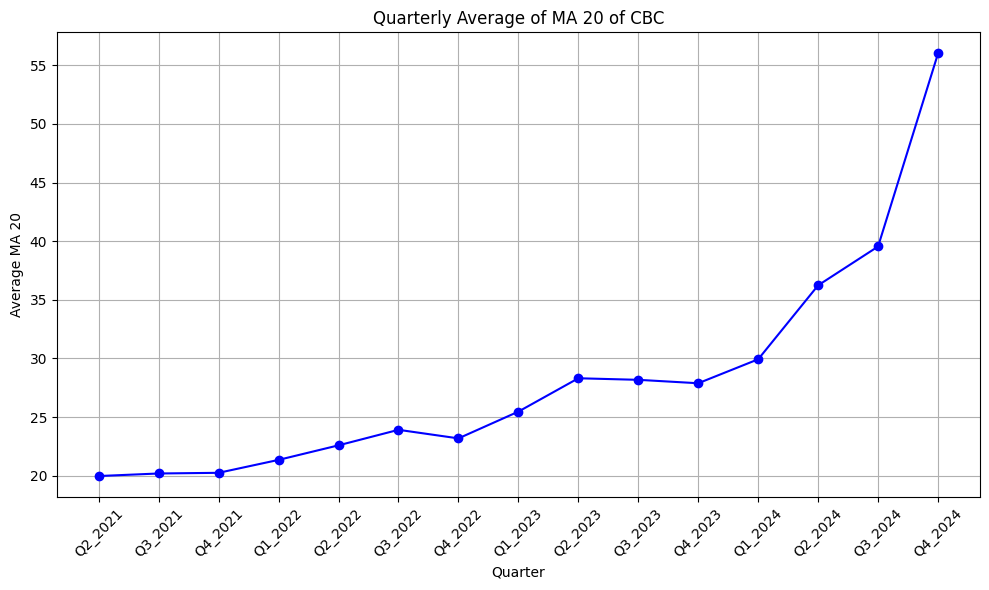

In [10]:
ticker = 'CBC'

plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Quarterly Average of MA 20 of {ticker}")
plt.xlabel('Quarter')
plt.ylabel('Average MA 20')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
ticker = 'CBC'
ticker_column = trend_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Max Quarterly MA 20: {max_value} (Quarter: {max_index})")
print(f"Min Quarterly MA 20 : {min_value} (Quarter: {min_index})")
print(f"Q1 Value in {ticker} Quarterly MA 20: {q1_val} ")
print(f"Q3 Value in {ticker} Quarterly MA 20: {q3_val} ")
print(f"Interquartile Range in the {ticker} Quarterly MA 20: {iqr}")

# Appending metrics to ma_analysis_df
data = {
    'Ticker': ticker,
    'Average Quarterly Moving Average': avg_value,
    'Median Quarterly Moving Average': median_value,
    'Max Quarterly Moving Average': max_value,
    'Max Quarter': max_index,
    'Min Quarterly Moving Average': min_value,
    'Min Quarter': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to ma_analysis_df
ma_analysis_df = pd.concat([ma_analysis_df, new_row], ignore_index=True)
ma_analysis_df

Max Quarterly MA 20: 56.002 (Quarter: Q4_2024)
Min Quarterly MA 20 : 19.976 (Quarter: Q2_2021)
Q1 Value in CBC Quarterly MA 20: 21.973 
Q3 Value in CBC Quarterly MA 20: 29.12 
Interquartile Range in the CBC Quarterly MA 20: 7.147


,Ticker,Average Quarterly Moving Average,Median Quarterly Moving Average,Max Quarterly Moving Average,Max Quarter,Min Quarterly Moving Average,Min Quarter,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1243.941,1287.820,1499.330,Q2_2022,988.418,Q2_2021,1113.078,1382.927,269.849
1,GLO,1895.233,1793.862,2657.725,Q4_2021,1483.467,Q2_2021,1639.834,2045.529,405.695
2,CBC,28.202,25.468,56.002,Q4_2024,19.976,Q2_2021,21.973,29.120,7.147


### 4. EMI

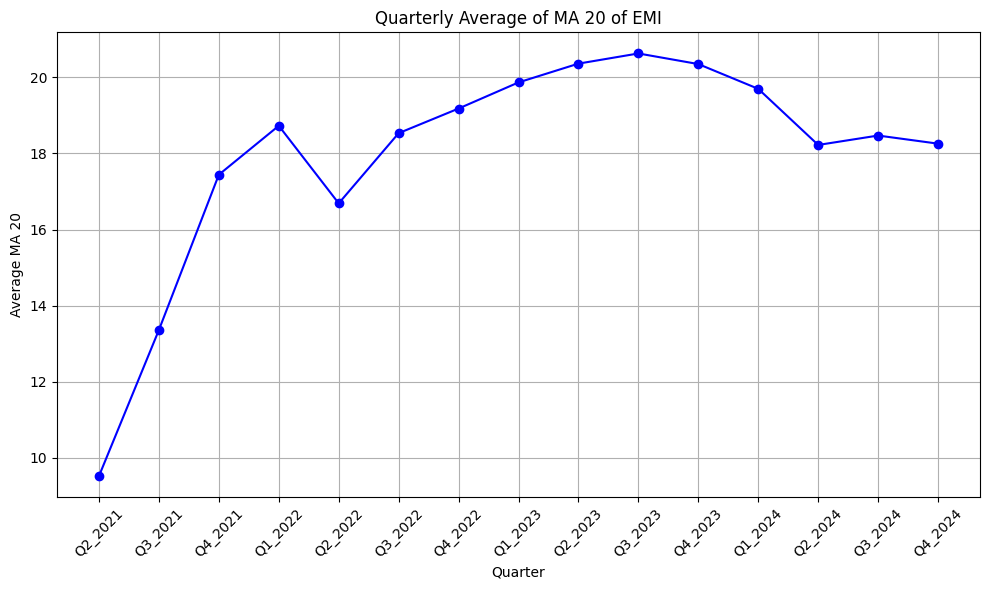

In [11]:
ticker = 'EMI'

plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Quarterly Average of MA 20 of {ticker}")
plt.xlabel('Quarter')
plt.ylabel('Average MA 20')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
ticker = 'EMI'
ticker_column = trend_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Max Quarterly MA 20: {max_value} (Quarter: {max_index})")
print(f"Min Quarterly MA 20 : {min_value} (Quarter: {min_index})")
print(f"Q1 Value in {ticker} Quarterly MA 20: {q1_val} ")
print(f"Q3 Value in {ticker} Quarterly MA 20: {q3_val} ")
print(f"Interquartile Range in the {ticker} Quarterly MA 20: {iqr}")

# Appending metrics to ma_analysis_df
data = {
    'Ticker': ticker,
    'Average Quarterly Moving Average': avg_value,
    'Median Quarterly Moving Average': median_value,
    'Max Quarterly Moving Average': max_value,
    'Max Quarter': max_index,
    'Min Quarterly Moving Average': min_value,
    'Min Quarter': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to ma_analysis_df
ma_analysis_df = pd.concat([ma_analysis_df, new_row], ignore_index=True)
ma_analysis_df

Max Quarterly MA 20: 20.63 (Quarter: Q3_2023)
Min Quarterly MA 20 : 9.519 (Quarter: Q2_2021)
Q1 Value in EMI Quarterly MA 20: 17.833 
Q3 Value in EMI Quarterly MA 20: 19.784 
Interquartile Range in the EMI Quarterly MA 20: 1.951


,Ticker,Average Quarterly Moving Average,Median Quarterly Moving Average,Max Quarterly Moving Average,Max Quarter,Min Quarterly Moving Average,Min Quarter,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1243.941,1287.820,1499.330,Q2_2022,988.418,Q2_2021,1113.078,1382.927,269.849
1,GLO,1895.233,1793.862,2657.725,Q4_2021,1483.467,Q2_2021,1639.834,2045.529,405.695
2,CBC,28.202,25.468,56.002,Q4_2024,19.976,Q2_2021,21.973,29.120,7.147
3,EMI,17.955,18.534,20.630,Q3_2023,9.519,Q2_2021,17.833,19.784,1.951


### 5. AEV

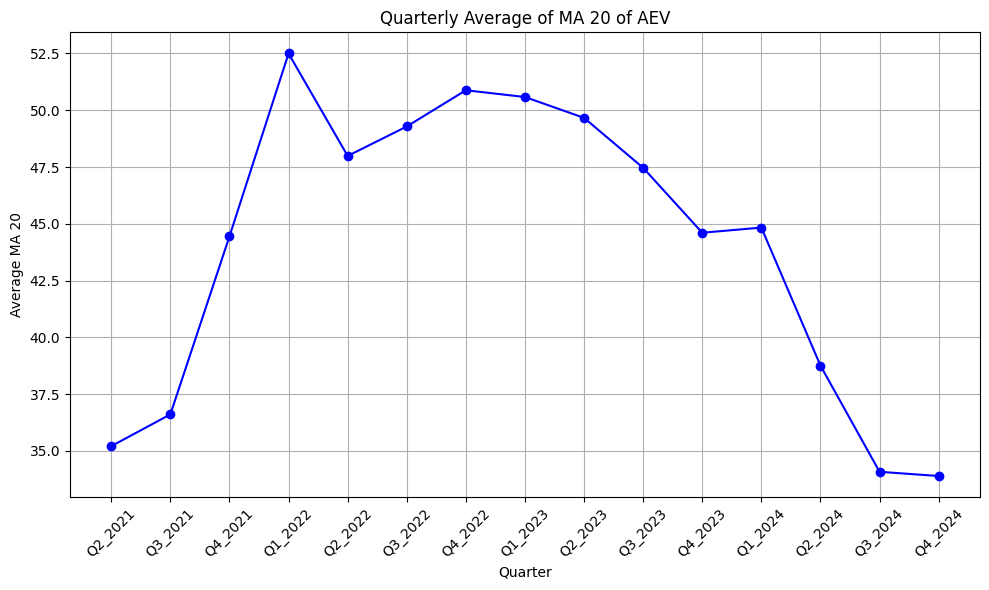

In [12]:
ticker = 'AEV'

plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Quarterly Average of MA 20 of {ticker}")
plt.xlabel('Quarter')
plt.ylabel('Average MA 20')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
ticker = 'AEV'
ticker_column = trend_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Max Quarterly MA 20: {max_value} (Quarter: {max_index})")
print(f"Min Quarterly MA 20 : {min_value} (Quarter: {min_index})")
print(f"Q1 Value in {ticker} Quarterly MA 20: {q1_val} ")
print(f"Q3 Value in {ticker} Quarterly MA 20: {q3_val} ")
print(f"Interquartile Range in the {ticker} Quarterly MA 20: {iqr}")

# Appending metrics to ma_analysis_df
data = {
    'Ticker': ticker,
    'Average Quarterly Moving Average': avg_value,
    'Median Quarterly Moving Average': median_value,
    'Max Quarterly Moving Average': max_value,
    'Max Quarter': max_index,
    'Min Quarterly Moving Average': min_value,
    'Min Quarter': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to ma_analysis_df
ma_analysis_df = pd.concat([ma_analysis_df, new_row], ignore_index=True)
ma_analysis_df

Max Quarterly MA 20: 52.5 (Quarter: Q1_2022)
Min Quarterly MA 20 : 33.894 (Quarter: Q4_2024)
Q1 Value in AEV Quarterly MA 20: 37.683 
Q3 Value in AEV Quarterly MA 20: 49.474 
Interquartile Range in the AEV Quarterly MA 20: 11.791


,Ticker,Average Quarterly Moving Average,Median Quarterly Moving Average,Max Quarterly Moving Average,Max Quarter,Min Quarterly Moving Average,Min Quarter,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1243.941,1287.820,1499.330,Q2_2022,988.418,Q2_2021,1113.078,1382.927,269.849
1,GLO,1895.233,1793.862,2657.725,Q4_2021,1483.467,Q2_2021,1639.834,2045.529,405.695
2,CBC,28.202,25.468,56.002,Q4_2024,19.976,Q2_2021,21.973,29.120,7.147
3,EMI,17.955,18.534,20.630,Q3_2023,9.519,Q2_2021,17.833,19.784,1.951
4,AEV,44.053,44.833,52.500,Q1_2022,33.894,Q4_2024,37.683,49.474,11.791


### 6. SMC

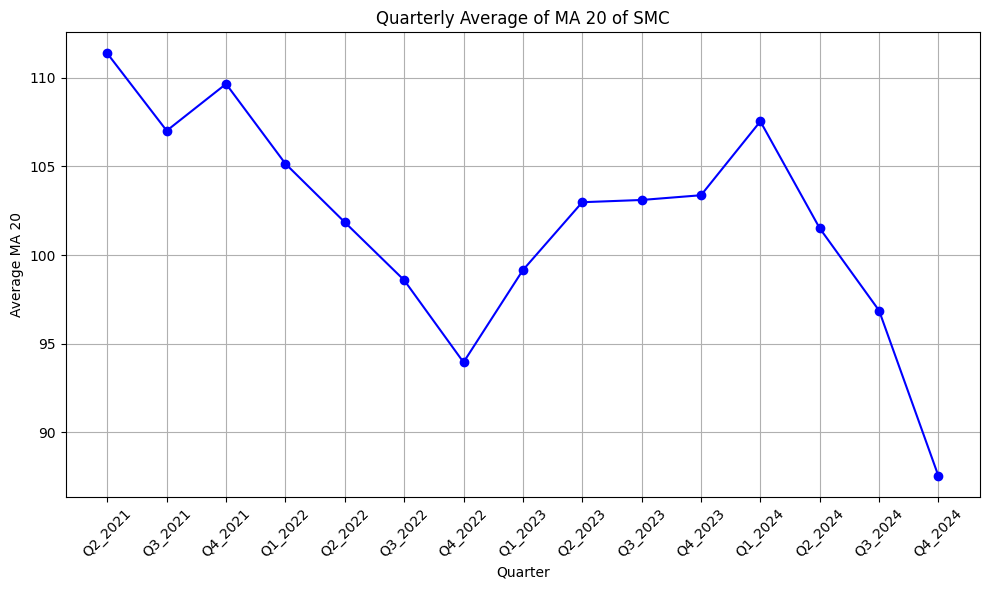

In [ ]:
ticker = 'SMC'

plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Quarterly Average of MA 20 of {ticker}")
plt.xlabel('Quarter')
plt.ylabel('Average MA 20')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
ticker = 'SMC'
ticker_column = trend_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Max Quarterly MA 20: {max_value} (Quarter: {max_index})")
print(f"Min Quarterly MA 20 : {min_value} (Quarter: {min_index})")
print(f"Q1 Value in {ticker} Quarterly MA 20: {q1_val} ")
print(f"Q3 Value in {ticker} Quarterly MA 20: {q3_val} ")
print(f"Interquartile Range in the {ticker} Quarterly MA 20: {iqr}")

# Appending metrics to ma_analysis_df
data = {
    'Ticker': ticker,
    'Average Quarterly Moving Average': avg_value,
    'Median Quarterly Moving Average': median_value,
    'Max Quarterly Moving Average': max_value,
    'Max Quarter': max_index,
    'Min Quarterly Moving Average': min_value,
    'Min Quarter': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to ma_analysis_df
ma_analysis_df = pd.concat([ma_analysis_df, new_row], ignore_index=True)
ma_analysis_df

Max Quarterly MA 20: 111.376 (Quarter: Q2_2021)
Min Quarterly MA 20 : 87.533 (Quarter: Q4_2024)
Q1 Value in SMC Quarterly MA 20: 98.868 
Q3 Value in SMC Quarterly MA 20: 106.085 
Interquartile Range in the SMC Quarterly MA 20: 7.217


,Ticker,Average Quarterly Moving Average,Median Quarterly Moving Average,Max Quarterly Moving Average,Max Quarter,Min Quarterly Moving Average,Min Quarter,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1243.941,1287.820,1499.330,Q2_2022,988.418,Q2_2021,1113.078,1382.927,269.849
1,GLO,1895.233,1793.862,2657.725,Q4_2021,1483.467,Q2_2021,1639.834,2045.529,405.695
2,CBC,28.202,25.468,56.002,Q4_2024,19.976,Q2_2021,21.973,29.120,7.147
3,EMI,17.955,18.534,20.630,Q3_2023,9.519,Q2_2021,17.833,19.784,1.951
4,AEV,44.053,44.833,52.500,Q1_2022,33.894,Q4_2024,37.683,49.474,11.791
5,SMC,101.978,102.983,111.376,Q2_2021,87.533,Q4_2024,98.868,106.085,7.217


### 7. URC

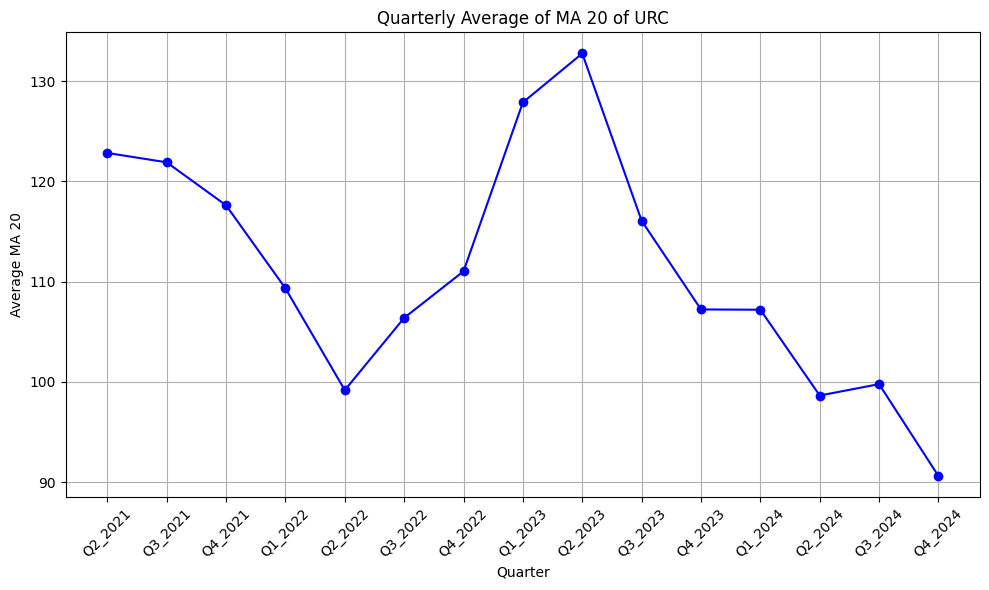

In [14]:
ticker = 'URC'

plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Quarterly Average of MA 20 of {ticker}")
plt.xlabel('Quarter')
plt.ylabel('Average MA 20')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
ticker = 'URC'
ticker_column = trend_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Max Quarterly MA 20: {max_value} (Quarter: {max_index})")
print(f"Min Quarterly MA 20 : {min_value} (Quarter: {min_index})")
print(f"Q1 Value in {ticker} Quarterly MA 20: {q1_val} ")
print(f"Q3 Value in {ticker} Quarterly MA 20: {q3_val} ")
print(f"Interquartile Range in the {ticker} Quarterly MA 20: {iqr}")

# Appending metrics to ma_analysis_df
data = {
    'Ticker': ticker,
    'Average Quarterly Moving Average': avg_value,
    'Median Quarterly Moving Average': median_value,
    'Max Quarterly Moving Average': max_value,
    'Max Quarter': max_index,
    'Min Quarterly Moving Average': min_value,
    'Min Quarter': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to ma_analysis_df
ma_analysis_df = pd.concat([ma_analysis_df, new_row], ignore_index=True)
ma_analysis_df

Max Quarterly MA 20: 132.765 (Quarter: Q2_2023)
Min Quarterly MA 20 : 90.61 (Quarter: Q4_2024)
Q1 Value in URC Quarterly MA 20: 103.082 
Q3 Value in URC Quarterly MA 20: 119.762 
Interquartile Range in the URC Quarterly MA 20: 16.68


,Ticker,Average Quarterly Moving Average,Median Quarterly Moving Average,Max Quarterly Moving Average,Max Quarter,Min Quarterly Moving Average,Min Quarter,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1243.941,1287.820,1499.330,Q2_2022,988.418,Q2_2021,1113.078,1382.927,269.849
1,GLO,1895.233,1793.862,2657.725,Q4_2021,1483.467,Q2_2021,1639.834,2045.529,405.695
2,CBC,28.202,25.468,56.002,Q4_2024,19.976,Q2_2021,21.973,29.120,7.147
3,EMI,17.955,18.534,20.630,Q3_2023,9.519,Q2_2021,17.833,19.784,1.951
4,AEV,44.053,44.833,52.500,Q1_2022,33.894,Q4_2024,37.683,49.474,11.791
5,SMC,101.978,102.983,111.376,Q2_2021,87.533,Q4_2024,98.868,106.085,7.217
6,URC,111.232,109.333,132.765,Q2_2023,90.610,Q4_2024,103.082,119.762,16.680


### 8. CNPF

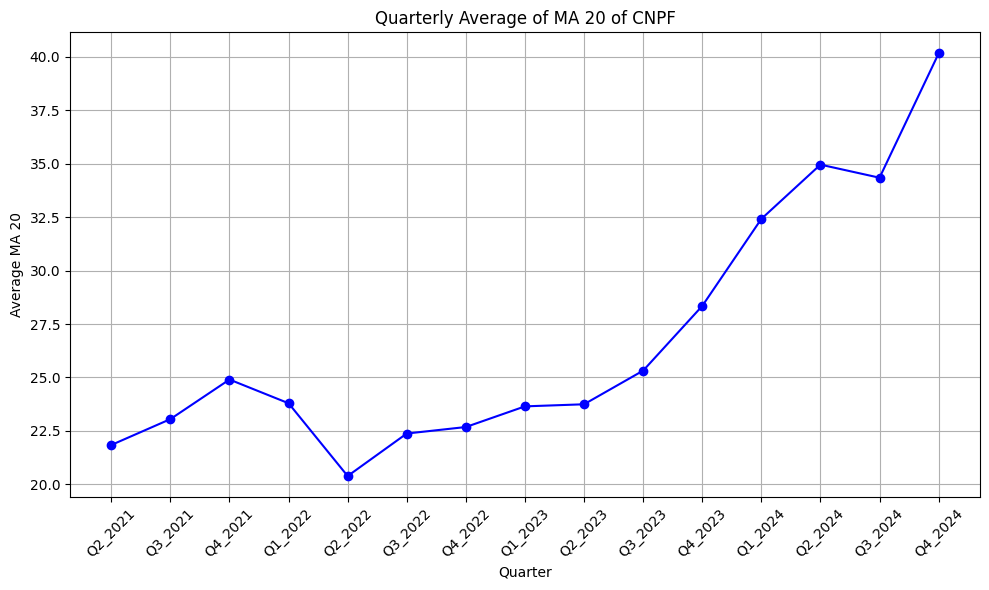

In [15]:
ticker = 'CNPF'

plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Quarterly Average of MA 20 of {ticker}")
plt.xlabel('Quarter')
plt.ylabel('Average MA 20')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
ticker = 'CNPF'
ticker_column = trend_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Max Quarterly MA 20: {max_value} (Quarter: {max_index})")
print(f"Min Quarterly MA 20 : {min_value} (Quarter: {min_index})")
print(f"Q1 Value in {ticker} Quarterly MA 20: {q1_val} ")
print(f"Q3 Value in {ticker} Quarterly MA 20: {q3_val} ")
print(f"Interquartile Range in the {ticker} Quarterly MA 20: {iqr}")

# Appending metrics to ma_analysis_df
data = {
    'Ticker': ticker,
    'Average Quarterly Moving Average': avg_value,
    'Median Quarterly Moving Average': median_value,
    'Max Quarterly Moving Average': max_value,
    'Max Quarter': max_index,
    'Min Quarterly Moving Average': min_value,
    'Min Quarter': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to ma_analysis_df
ma_analysis_df = pd.concat([ma_analysis_df, new_row], ignore_index=True)
ma_analysis_df

Max Quarterly MA 20: 40.155 (Quarter: Q4_2024)
Min Quarterly MA 20 : 20.389 (Quarter: Q2_2022)
Q1 Value in CNPF Quarterly MA 20: 22.866 
Q3 Value in CNPF Quarterly MA 20: 30.38 
Interquartile Range in the CNPF Quarterly MA 20: 7.514


,Ticker,Average Quarterly Moving Average,Median Quarterly Moving Average,Max Quarterly Moving Average,Max Quarter,Min Quarterly Moving Average,Min Quarter,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1243.941,1287.820,1499.330,Q2_2022,988.418,Q2_2021,1113.078,1382.927,269.849
1,GLO,1895.233,1793.862,2657.725,Q4_2021,1483.467,Q2_2021,1639.834,2045.529,405.695
2,CBC,28.202,25.468,56.002,Q4_2024,19.976,Q2_2021,21.973,29.120,7.147
3,EMI,17.955,18.534,20.630,Q3_2023,9.519,Q2_2021,17.833,19.784,1.951
4,AEV,44.053,44.833,52.500,Q1_2022,33.894,Q4_2024,37.683,49.474,11.791
5,SMC,101.978,102.983,111.376,Q2_2021,87.533,Q4_2024,98.868,106.085,7.217
6,URC,111.232,109.333,132.765,Q2_2023,90.610,Q4_2024,103.082,119.762,16.680
7,CNPF,26.797,23.793,40.155,Q4_2024,20.389,Q2_2022,22.866,30.380,7.514


### 9. DMC

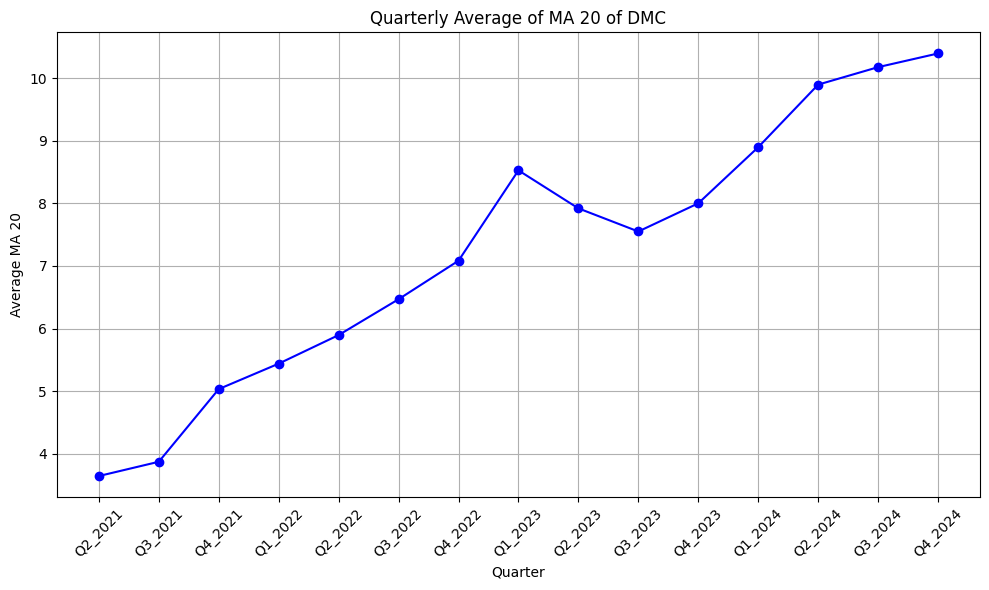

In [16]:
ticker = 'DMC'

plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Quarterly Average of MA 20 of {ticker}")
plt.xlabel('Quarter')
plt.ylabel('Average MA 20')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
ticker = 'DMC'
ticker_column = trend_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Max Quarterly MA 20: {max_value} (Quarter: {max_index})")
print(f"Min Quarterly MA 20 : {min_value} (Quarter: {min_index})")
print(f"Q1 Value in {ticker} Quarterly MA 20: {q1_val} ")
print(f"Q3 Value in {ticker} Quarterly MA 20: {q3_val} ")
print(f"Interquartile Range in the {ticker} Quarterly MA 20: {iqr}")

# Appending metrics to ma_analysis_df
data = {
    'Ticker': ticker,
    'Average Quarterly Moving Average': avg_value,
    'Median Quarterly Moving Average': median_value,
    'Max Quarterly Moving Average': max_value,
    'Max Quarter': max_index,
    'Min Quarterly Moving Average': min_value,
    'Min Quarter': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to ma_analysis_df
ma_analysis_df = pd.concat([ma_analysis_df, new_row], ignore_index=True)
ma_analysis_df

Max Quarterly MA 20: 10.396 (Quarter: Q4_2024)
Min Quarterly MA 20 : 3.644 (Quarter: Q2_2021)
Q1 Value in DMC Quarterly MA 20: 5.668 
Q3 Value in DMC Quarterly MA 20: 8.713 
Interquartile Range in the DMC Quarterly MA 20: 3.045


,Ticker,Average Quarterly Moving Average,Median Quarterly Moving Average,Max Quarterly Moving Average,Max Quarter,Min Quarterly Moving Average,Min Quarter,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1243.941,1287.820,1499.330,Q2_2022,988.418,Q2_2021,1113.078,1382.927,269.849
1,GLO,1895.233,1793.862,2657.725,Q4_2021,1483.467,Q2_2021,1639.834,2045.529,405.695
2,CBC,28.202,25.468,56.002,Q4_2024,19.976,Q2_2021,21.973,29.120,7.147
3,EMI,17.955,18.534,20.630,Q3_2023,9.519,Q2_2021,17.833,19.784,1.951
4,AEV,44.053,44.833,52.500,Q1_2022,33.894,Q4_2024,37.683,49.474,11.791
5,SMC,101.978,102.983,111.376,Q2_2021,87.533,Q4_2024,98.868,106.085,7.217
6,URC,111.232,109.333,132.765,Q2_2023,90.610,Q4_2024,103.082,119.762,16.680
7,CNPF,26.797,23.793,40.155,Q4_2024,20.389,Q2_2022,22.866,30.380,7.514
8,DMC,7.254,7.551,10.396,Q4_2024,3.644,Q2_2021,5.668,8.713,3.045


### 10. CNVRG

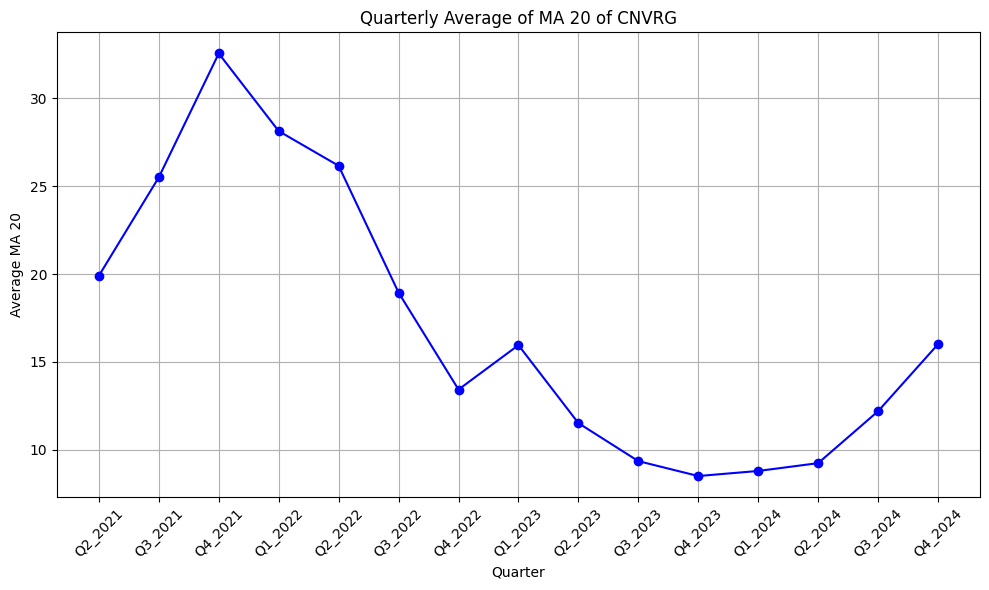

In [17]:
ticker = 'CNVRG'

plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Quarterly Average of MA 20 of {ticker}")
plt.xlabel('Quarter')
plt.ylabel('Average MA 20')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
ticker = 'CNVRG'
ticker_column = trend_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Max Quarterly MA 20: {max_value} (Quarter: {max_index})")
print(f"Min Quarterly MA 20 : {min_value} (Quarter: {min_index})")
print(f"Q1 Value in {ticker} Quarterly MA 20: {q1_val} ")
print(f"Q3 Value in {ticker} Quarterly MA 20: {q3_val} ")
print(f"Interquartile Range in the {ticker} Quarterly MA 20: {iqr}")

# Appending metrics to ma_analysis_df
data = {
    'Ticker': ticker,
    'Average Quarterly Moving Average': avg_value,
    'Median Quarterly Moving Average': median_value,
    'Max Quarterly Moving Average': max_value,
    'Max Quarter': max_index,
    'Min Quarterly Moving Average': min_value,
    'Min Quarter': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to ma_analysis_df
ma_analysis_df = pd.concat([ma_analysis_df, new_row], ignore_index=True)
ma_analysis_df

Max Quarterly MA 20: 32.536 (Quarter: Q4_2021)
Min Quarterly MA 20 : 8.518 (Quarter: Q4_2023)
Q1 Value in CNVRG Quarterly MA 20: 10.445 
Q3 Value in CNVRG Quarterly MA 20: 22.698 
Interquartile Range in the CNVRG Quarterly MA 20: 12.253


,Ticker,Average Quarterly Moving Average,Median Quarterly Moving Average,Max Quarterly Moving Average,Max Quarter,Min Quarterly Moving Average,Min Quarter,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1243.941,1287.820,1499.330,Q2_2022,988.418,Q2_2021,1113.078,1382.927,269.849
1,GLO,1895.233,1793.862,2657.725,Q4_2021,1483.467,Q2_2021,1639.834,2045.529,405.695
2,CBC,28.202,25.468,56.002,Q4_2024,19.976,Q2_2021,21.973,29.120,7.147
3,EMI,17.955,18.534,20.630,Q3_2023,9.519,Q2_2021,17.833,19.784,1.951
4,AEV,44.053,44.833,52.500,Q1_2022,33.894,Q4_2024,37.683,49.474,11.791
5,SMC,101.978,102.983,111.376,Q2_2021,87.533,Q4_2024,98.868,106.085,7.217
6,URC,111.232,109.333,132.765,Q2_2023,90.610,Q4_2024,103.082,119.762,16.680
7,CNPF,26.797,23.793,40.155,Q4_2024,20.389,Q2_2022,22.866,30.380,7.514
8,DMC,7.254,7.551,10.396,Q4_2024,3.644,Q2_2021,5.668,8.713,3.045
9,CNVRG,17.081,15.958,32.536,Q4_2021,8.518,Q4_2023,10.445,22.698,12.253


*{Place analysis of the seasonality of the stock here below the plt graph}*

In [21]:
display(ma_analysis_df)

,Ticker,Average Quarterly Moving Average,Median Quarterly Moving Average,Max Quarterly Moving Average,Max Quarter,Min Quarterly Moving Average,Min Quarter,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1243.941,1287.820,1499.330,Q2_2022,988.418,Q2_2021,1113.078,1382.927,269.849
1,GLO,1895.233,1793.862,2657.725,Q4_2021,1483.467,Q2_2021,1639.834,2045.529,405.695
2,CBC,28.202,25.468,56.002,Q4_2024,19.976,Q2_2021,21.973,29.120,7.147
3,EMI,17.955,18.534,20.630,Q3_2023,9.519,Q2_2021,17.833,19.784,1.951
4,AEV,44.053,44.833,52.500,Q1_2022,33.894,Q4_2024,37.683,49.474,11.791
5,SMC,101.978,102.983,111.376,Q2_2021,87.533,Q4_2024,98.868,106.085,7.217
6,URC,111.232,109.333,132.765,Q2_2023,90.610,Q4_2024,103.082,119.762,16.680
7,CNPF,26.797,23.793,40.155,Q4_2024,20.389,Q2_2022,22.866,30.380,7.514
8,DMC,7.254,7.551,10.396,Q4_2024,3.644,Q2_2021,5.668,8.713,3.045
9,CNVRG,17.081,15.958,32.536,Q4_2021,8.518,Q4_2023,10.445,22.698,12.253


In [23]:
ma_analysis_df.to_csv('scratch_dir/ma_summary.csv', index=False)

#### Analysis

Most Stable Trends (Low IQRs)

* EMI (IQR: 1.951) and DMC (3.045) show exceptionally low trend volatility.
* EMI's range is very narrow (Min: 9.5, Max: 20.6), suggesting a stable, low-risk trend.
* DMC’s low average (~7.25) and IQR indicate a steady but modest stock, likely suited to conservative investors.

Stocks with High Trend Volatility

* GLO (IQR: 405.695), TEL (IQR: 269.849), and URC (IQR: 16.68) show strong swings in quarterly trends.
* GLO reached a massive peak of 2,657.7 in Q4 2021, possibly driven by a rally or earnings catalyst, followed by lower quarters.
* TEL, while generally more stable than GLO, also experienced major fluctuations (Min: 988 → Max: 1,499).

Notable Performance Peaks

* GLO (Q4 2021) and TEL (Q2 2022) recorded the highest max quarterly averages, reflecting strong bullish quarters.
* These could coincide with post-COVID recovery, earnings beats, or dividend announcements.
* CBC (Q4 2024) and CNPF (Q4 2024) also peaked recently, suggesting positive trends in recent quarters.

Trend Bottoms

* CBC (Q2 2021) and CNVRG (Q4 2023) posted lowest quarterly moving averages, indicating market underperformance or corrections.
* A few stocks like AEV, URC, SMC hit their lowest points in 2024, possibly reflecting broader market downturns or sector-specific headwinds.

Discrepancies Between Mean and Median

* TEL (Mean: 1243.94, Median: 1287.82) and GLO (Mean: 1895.23, Median: 1793.86) have mean < median, suggesting negative skew — a few weaker quarters pulled the average down.
* CNVRG and CNPF also show similar skewness.

| Ticker    | Trend Type            | Max Quarter | IQR    | Insight Summary                                 |
| --------- | --------------------- | ----------- | ------ | ----------------------------------------------- |
| **TEL**   | High volatility       | Q2\_2022    | 269.85 | Strong gains in 2022, but some trend downturns  |
| **GLO**   | Very high volatility  | Q4\_2021    | 405.70 | Peak in late 2021, significant trend swings     |
| **CBC**   | Moderate rising trend | Q4\_2024    | 7.15   | Slow upward trend with recent high              |
| **EMI**   | Stable & consistent   | Q3\_2023    | 1.95   | Low-risk, steady performer                      |
| **AEV**   | Mild cyclic trend     | Q1\_2022    | 11.79  | Volatile but less extreme; long-term steadiness |
| **SMC**   | Stable trend          | Q2\_2021    | 7.22   | Consistent pattern; safe asset                  |
| **URC**   | Moderate volatility   | Q2\_2023    | 16.68  | Some recent momentum in 2023                    |
| **CNPF**  | Gradual growth        | Q4\_2024    | 7.51   | Slightly increasing trend; growth potential     |
| **DMC**   | Stable but low-value  | Q4\_2024    | 3.05   | Very steady, but modest value stock             |
| **CNVRG** | Volatile emerging     | Q4\_2021    | 12.25  | Early growth, now cooling off                   |


Key Takeaways:

* For trend followers: **Focus on GLO, TEL, and CNPF** — strong upward quarters may suggest momentum-based opportunities.
* For low-risk investors: **EMI, SMC, DMC provide price stability** across quarters.
* For cyclical plays: AEV, URC could be leveraged during known quarters of strength.
* **Q4 tends to be a performance quarter**: 4 stocks (GLO, CBC, CNPF, CNVRG) peaked in Q4 — could signal year-end bullish trends.

### Notes in using this Seasonality EDA Starter Notebook

Note: To do the EDA of the trend of the other stock, just duplicate the above code cells and replace the stock ticker in the line `ticker = 'AC'`

* You might also want to consider replacing the color of the line for differentiation to the other stock